In [67]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from random import *
from sklearn.externals import joblib
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (24,20)

In [51]:
def bleach(string):
    temp = ""
    string = str(string)
    for i in string:
        if i in ["1","2","3","4","5","6","7","8","9","0", "."]:
            temp += i
    if len(temp) > 0:
        return int(temp)


In [52]:
model = joblib.load('rfr_model.pkl')
communities = ['pickup_community_area_1', 'pickup_community_area_2',
       'pickup_community_area_3', 'pickup_community_area_4',
       'pickup_community_area_5', 'pickup_community_area_6',
       'pickup_community_area_7', 'pickup_community_area_8',
       'pickup_community_area_9', 'pickup_community_area_10',
       'pickup_community_area_11', 'pickup_community_area_12',
       'pickup_community_area_13', 'pickup_community_area_14',
       'pickup_community_area_15', 'pickup_community_area_16',
       'pickup_community_area_17', 'pickup_community_area_19',
       'pickup_community_area_20', 'pickup_community_area_21',
       'pickup_community_area_22', 'pickup_community_area_23',
       'pickup_community_area_24', 'pickup_community_area_25',
       'pickup_community_area_26', 'pickup_community_area_27',
       'pickup_community_area_28', 'pickup_community_area_29',
       'pickup_community_area_30', 'pickup_community_area_31',
       'pickup_community_area_32', 'pickup_community_area_33',
       'pickup_community_area_34', 'pickup_community_area_35',
       'pickup_community_area_36', 'pickup_community_area_37',
       'pickup_community_area_38', 'pickup_community_area_39',
       'pickup_community_area_40', 'pickup_community_area_41',
       'pickup_community_area_42', 'pickup_community_area_43',
       'pickup_community_area_44', 'pickup_community_area_45',
       'pickup_community_area_46', 'pickup_community_area_49',
       'pickup_community_area_50', 'pickup_community_area_51',
       'pickup_community_area_53', 'pickup_community_area_56',
       'pickup_community_area_57', 'pickup_community_area_58',
       'pickup_community_area_59', 'pickup_community_area_60',
       'pickup_community_area_61', 'pickup_community_area_62',
       'pickup_community_area_63', 'pickup_community_area_64',
       'pickup_community_area_66', 'pickup_community_area_68',
       'pickup_community_area_69', 'pickup_community_area_70',
       'pickup_community_area_72', 'pickup_community_area_73',
       'pickup_community_area_76', 'pickup_community_area_77',]

In [53]:
len(communities)

66

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

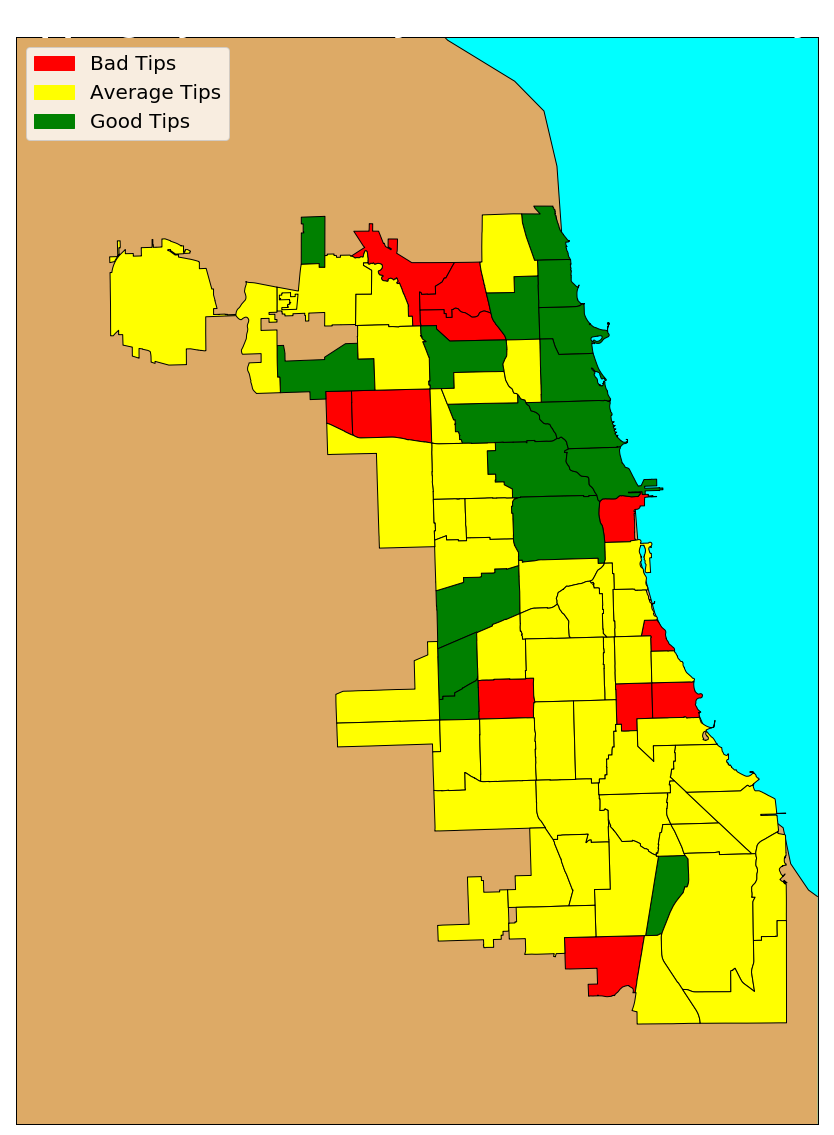

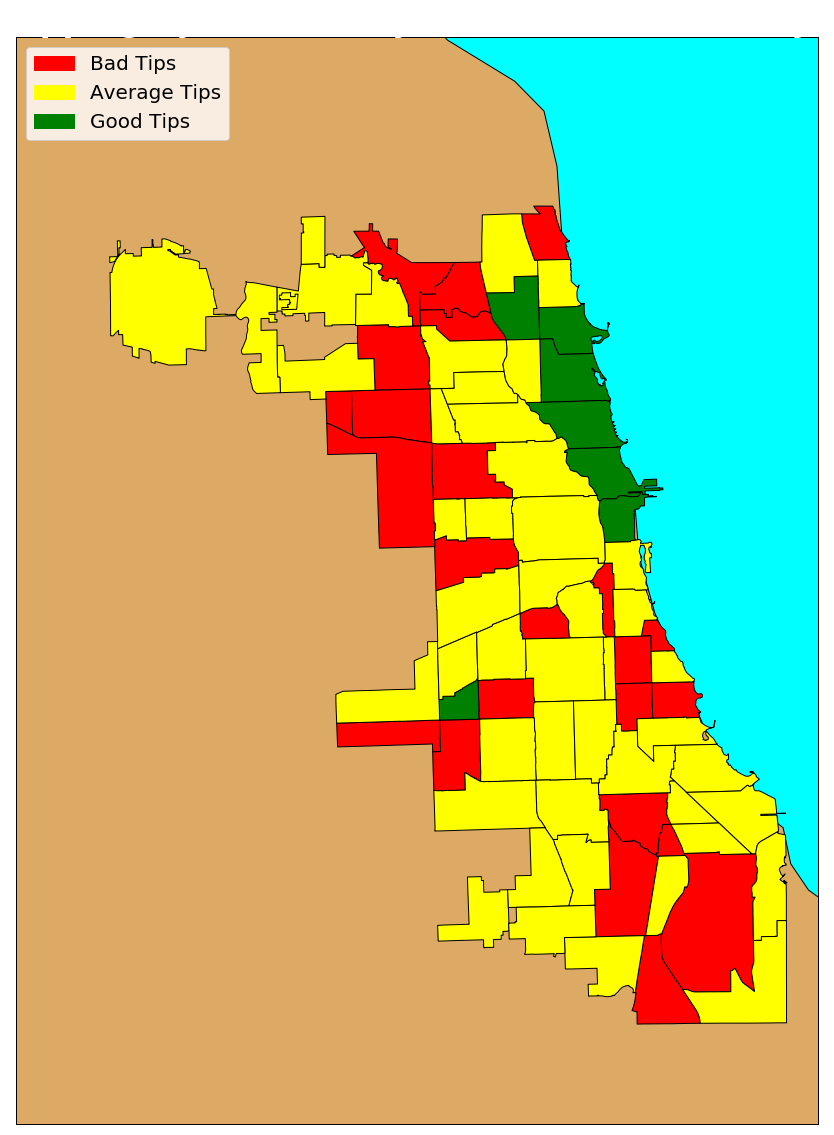

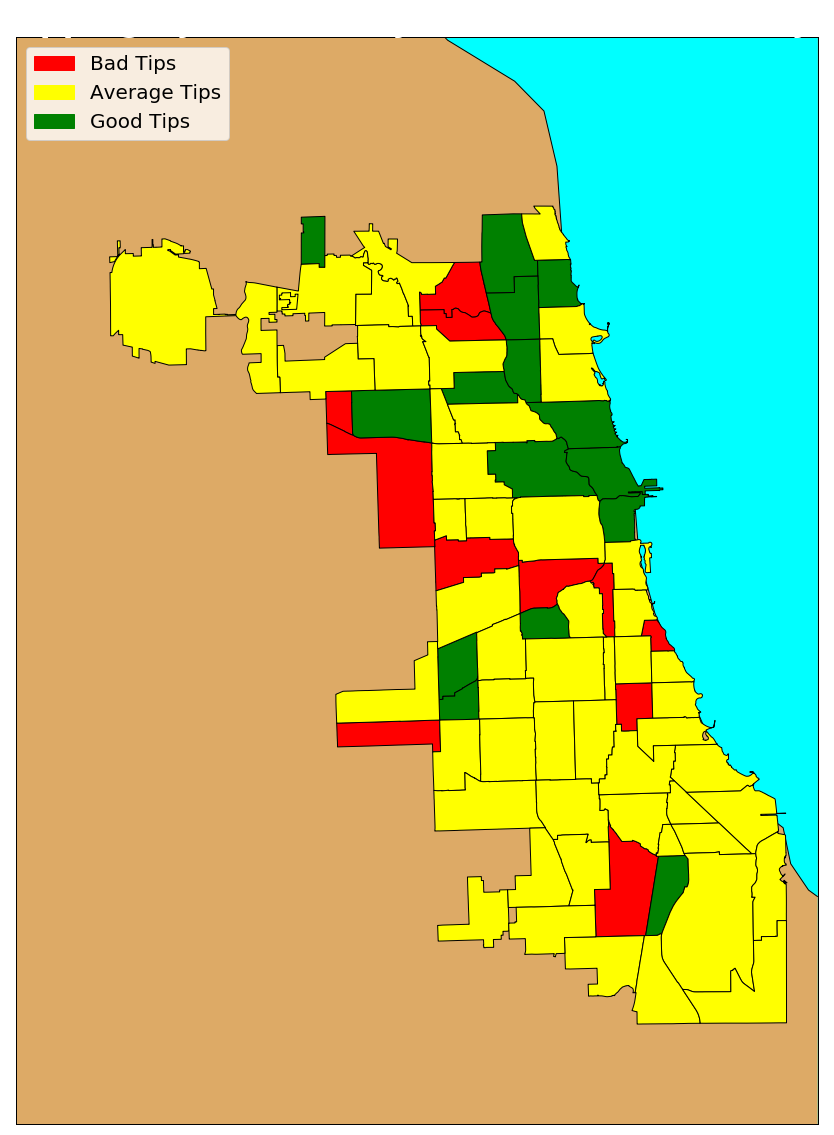

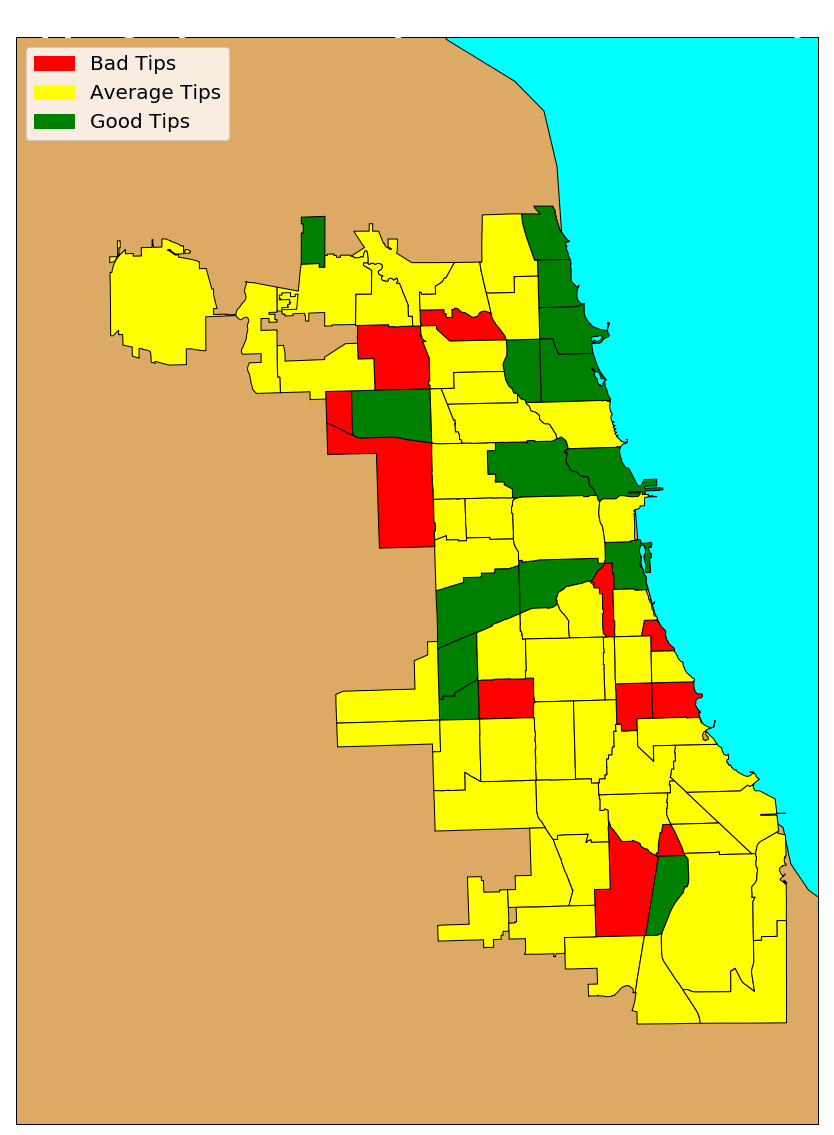

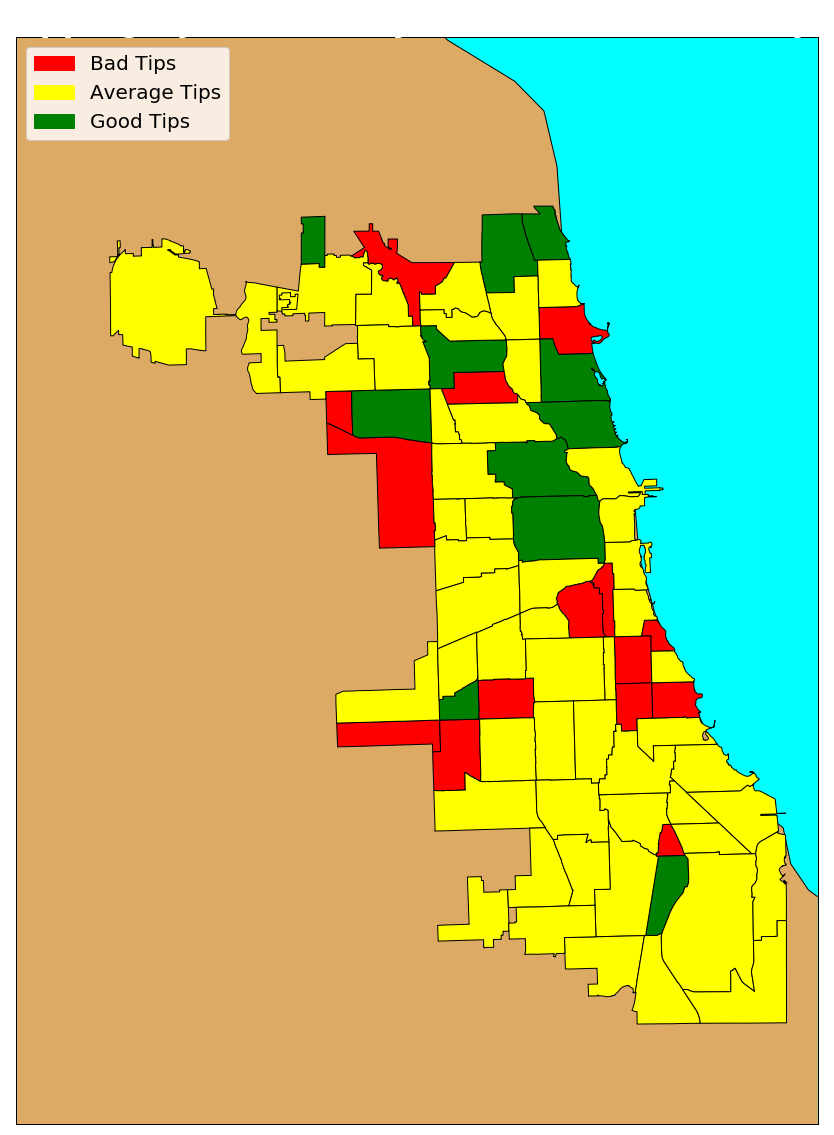

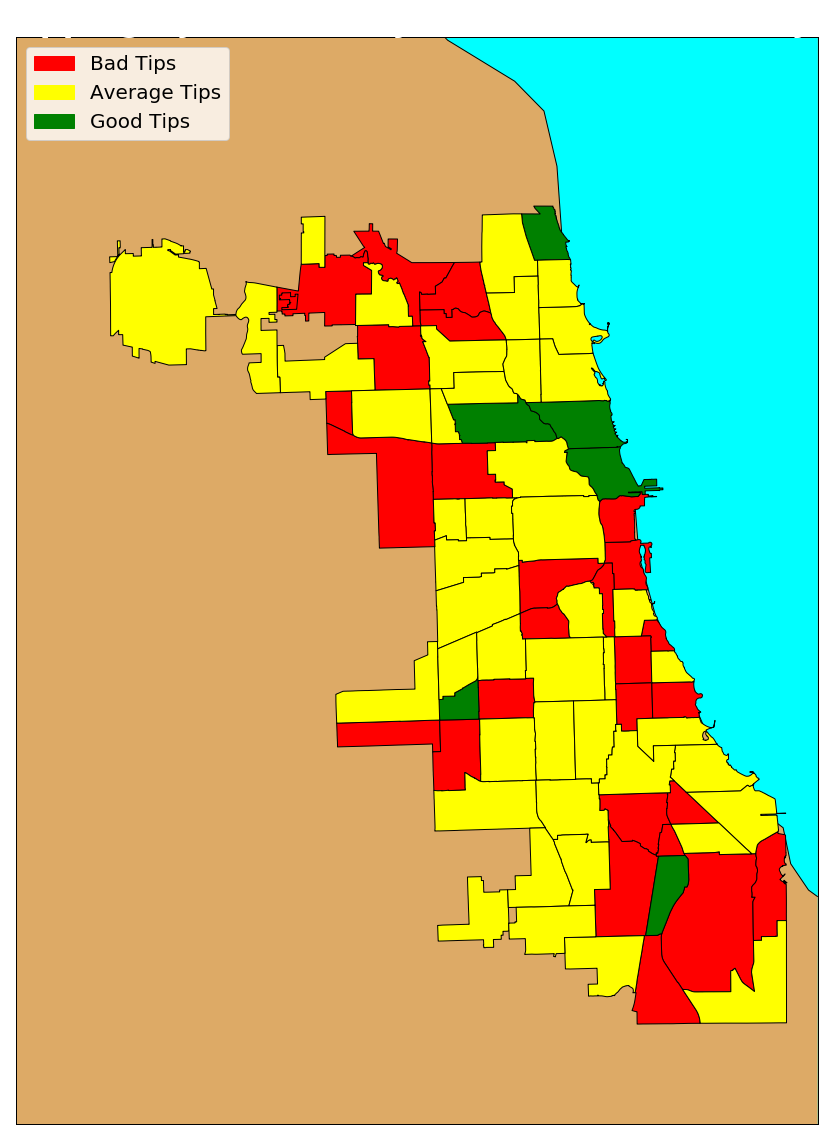

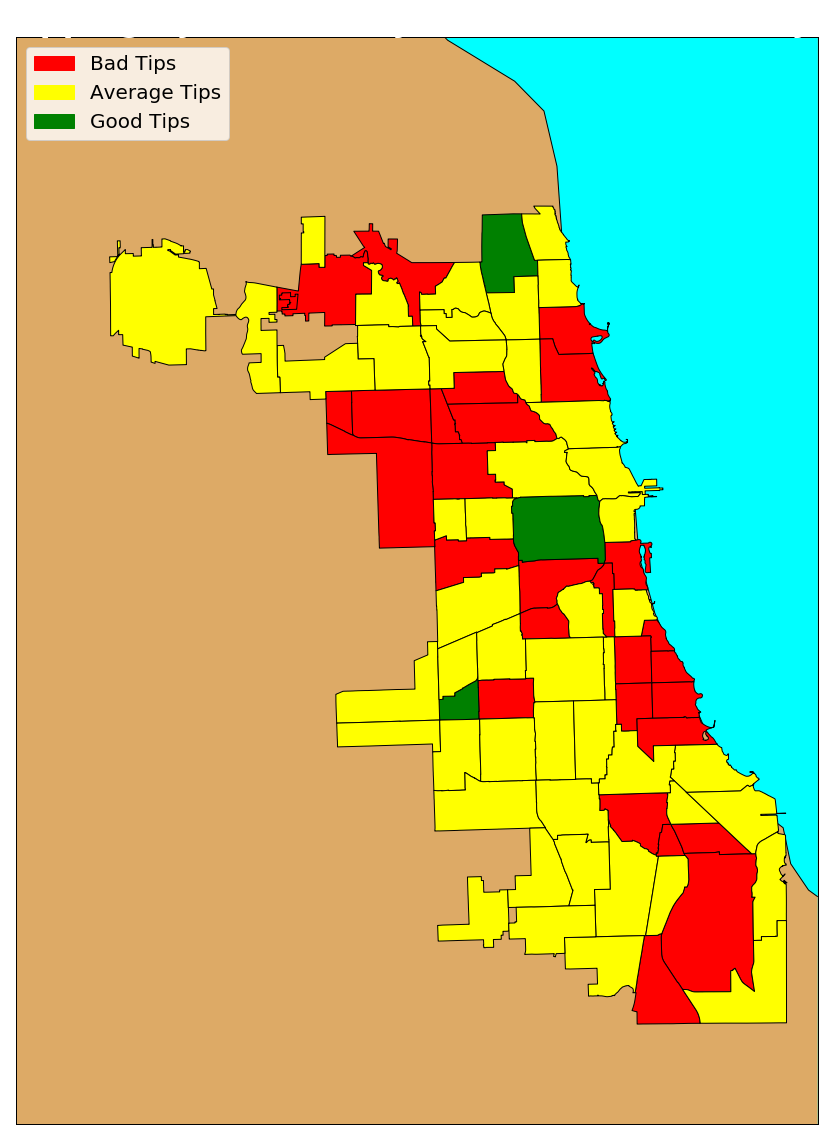

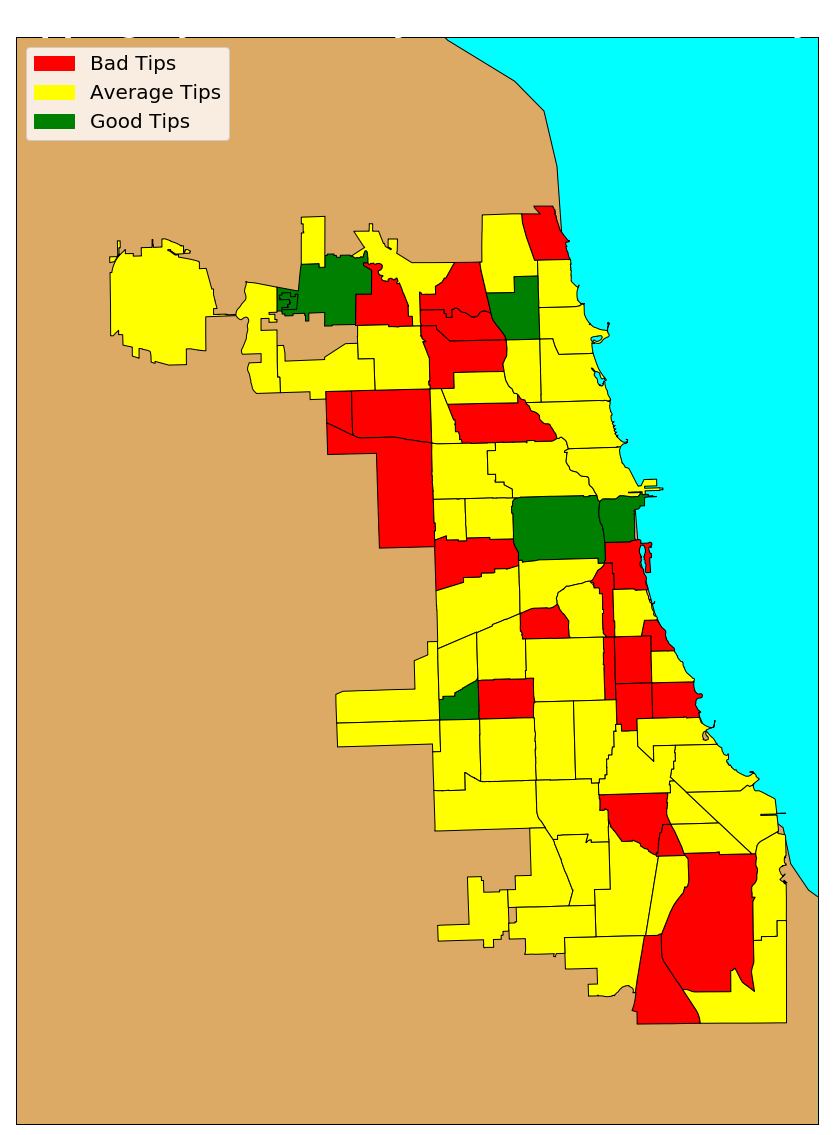

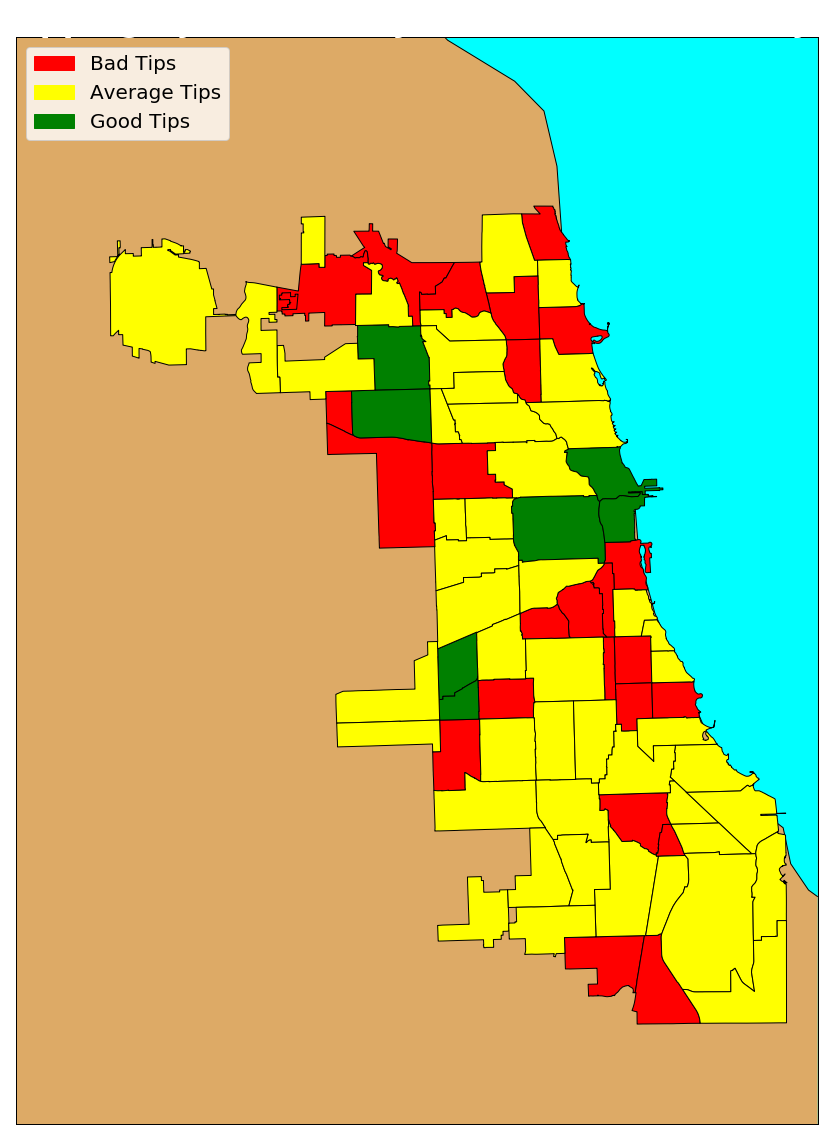

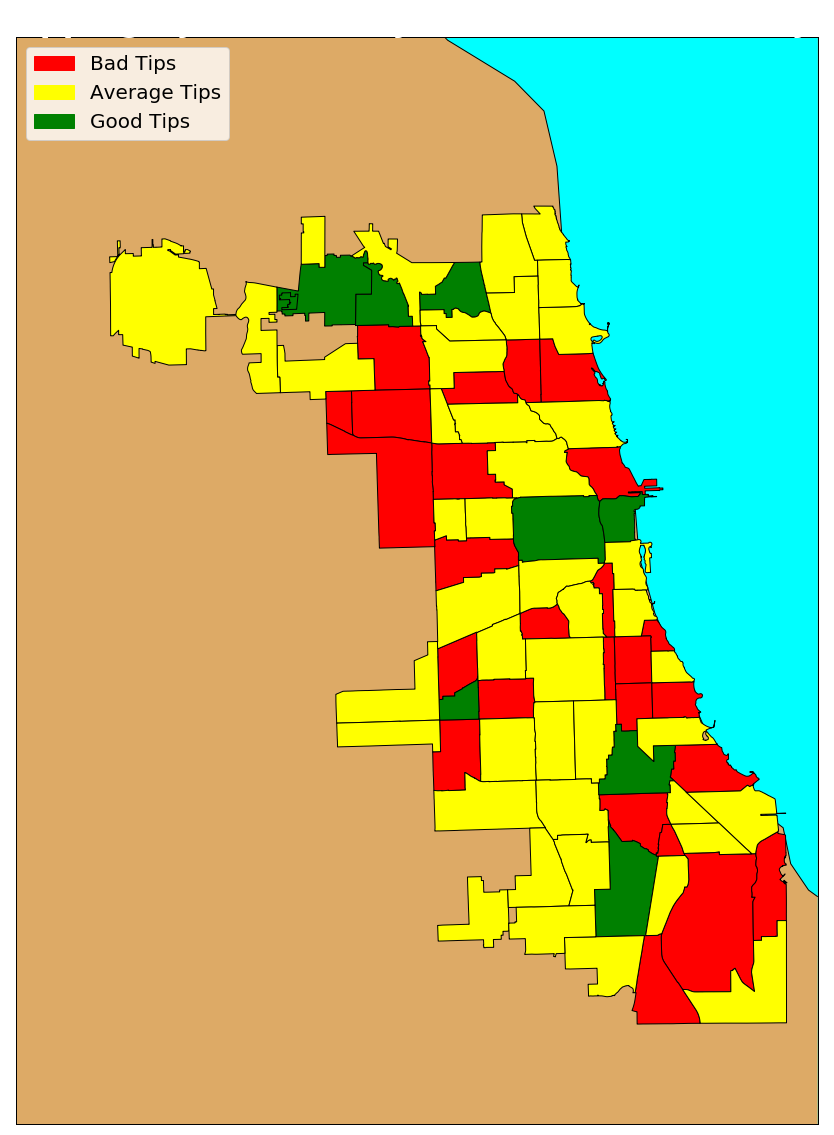

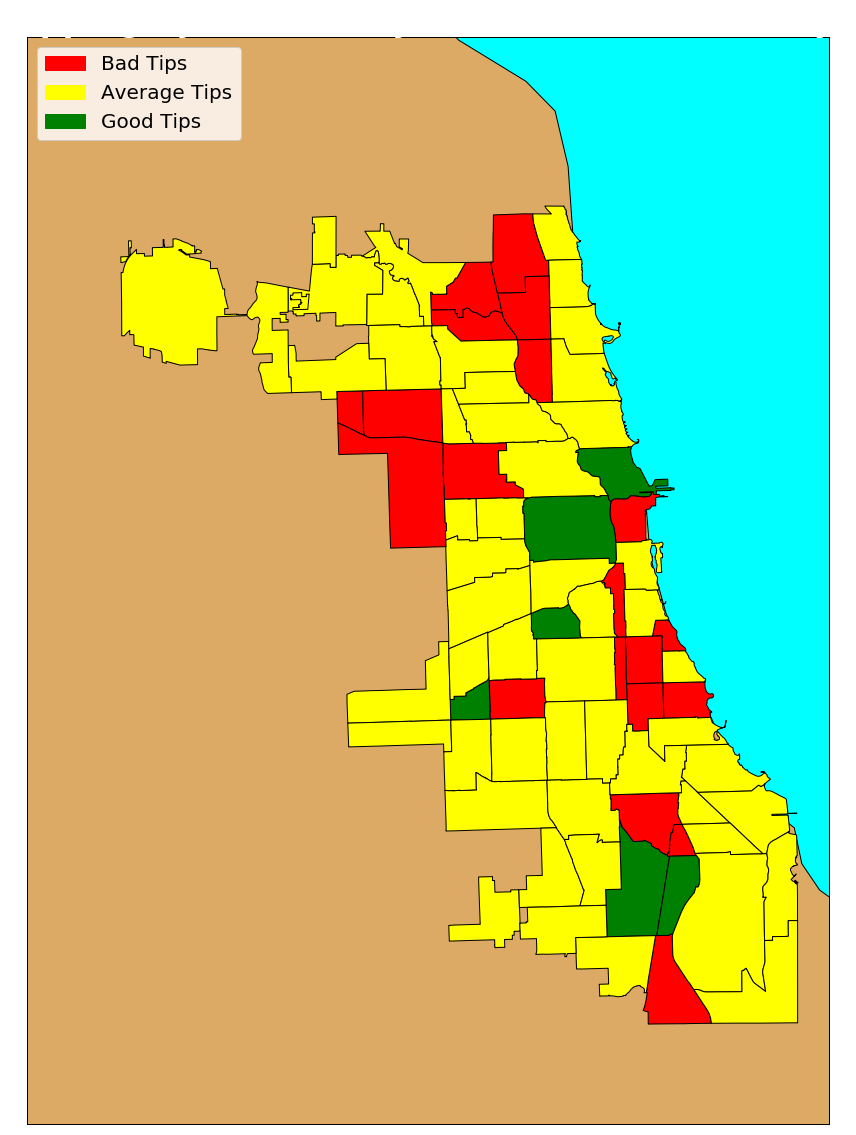

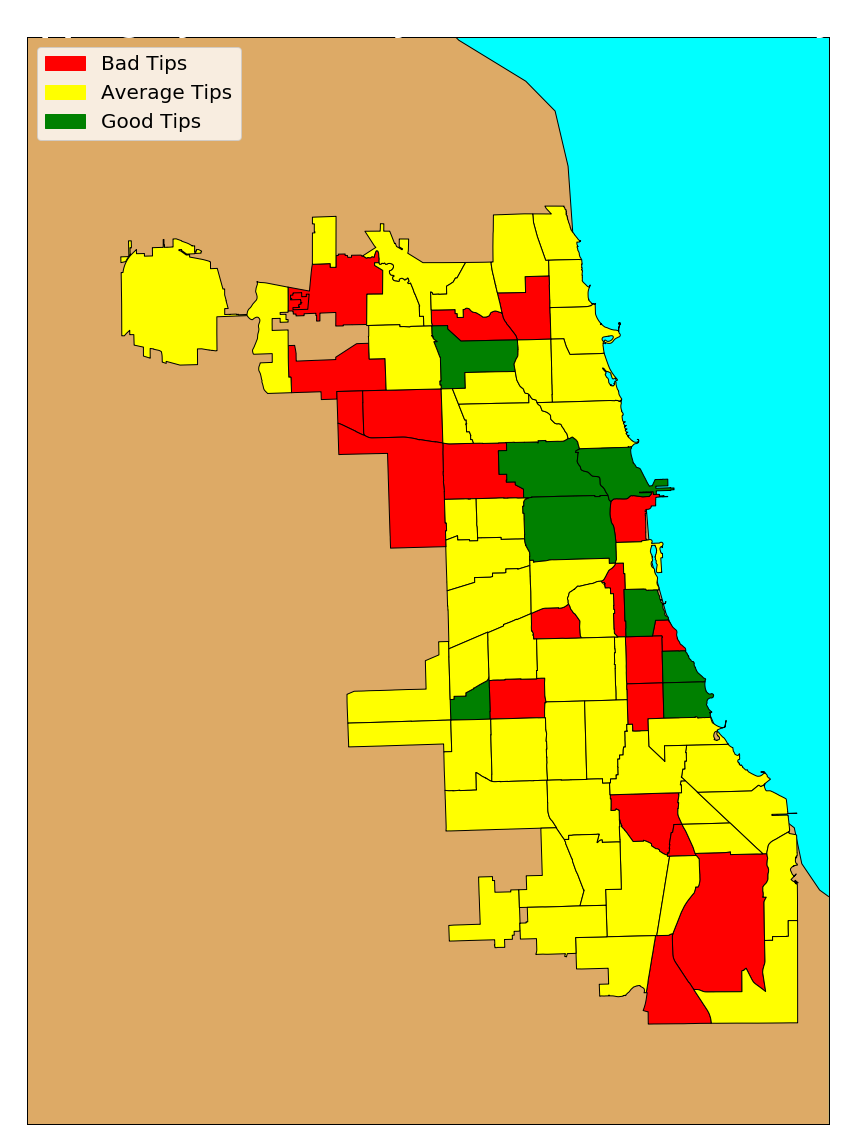

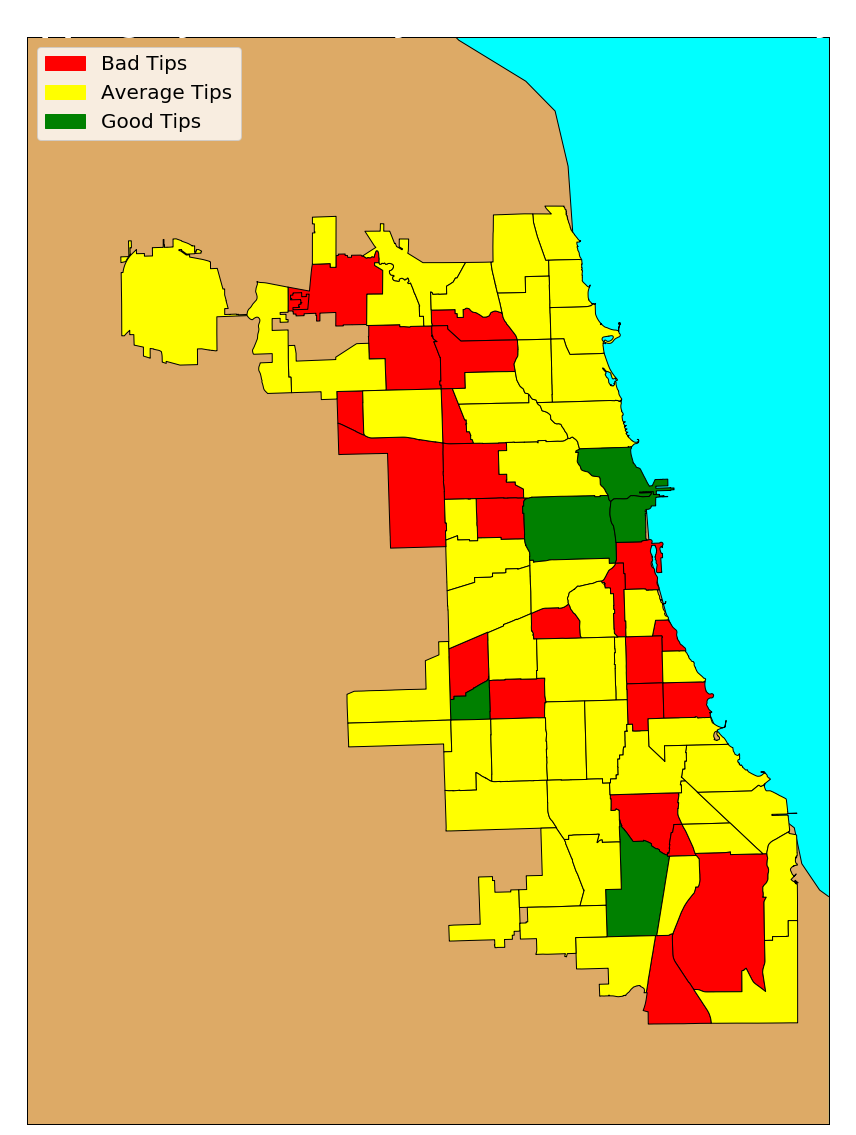

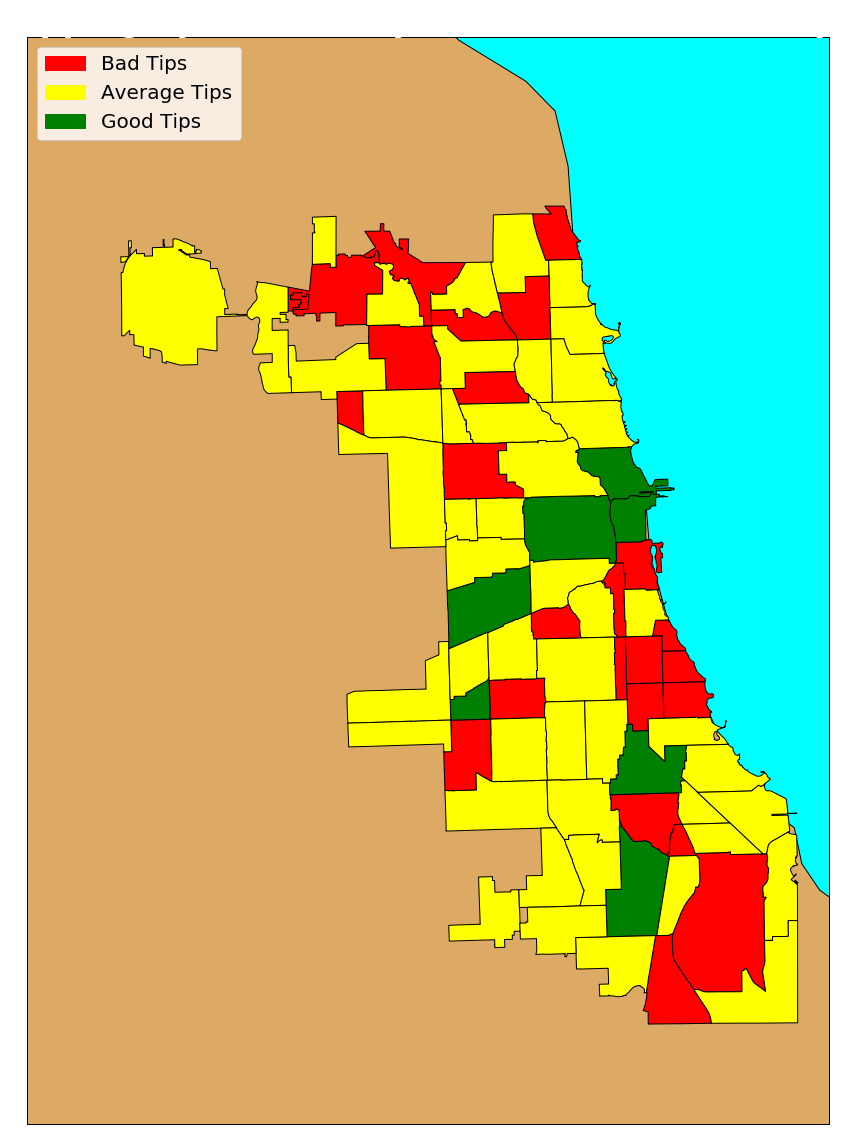

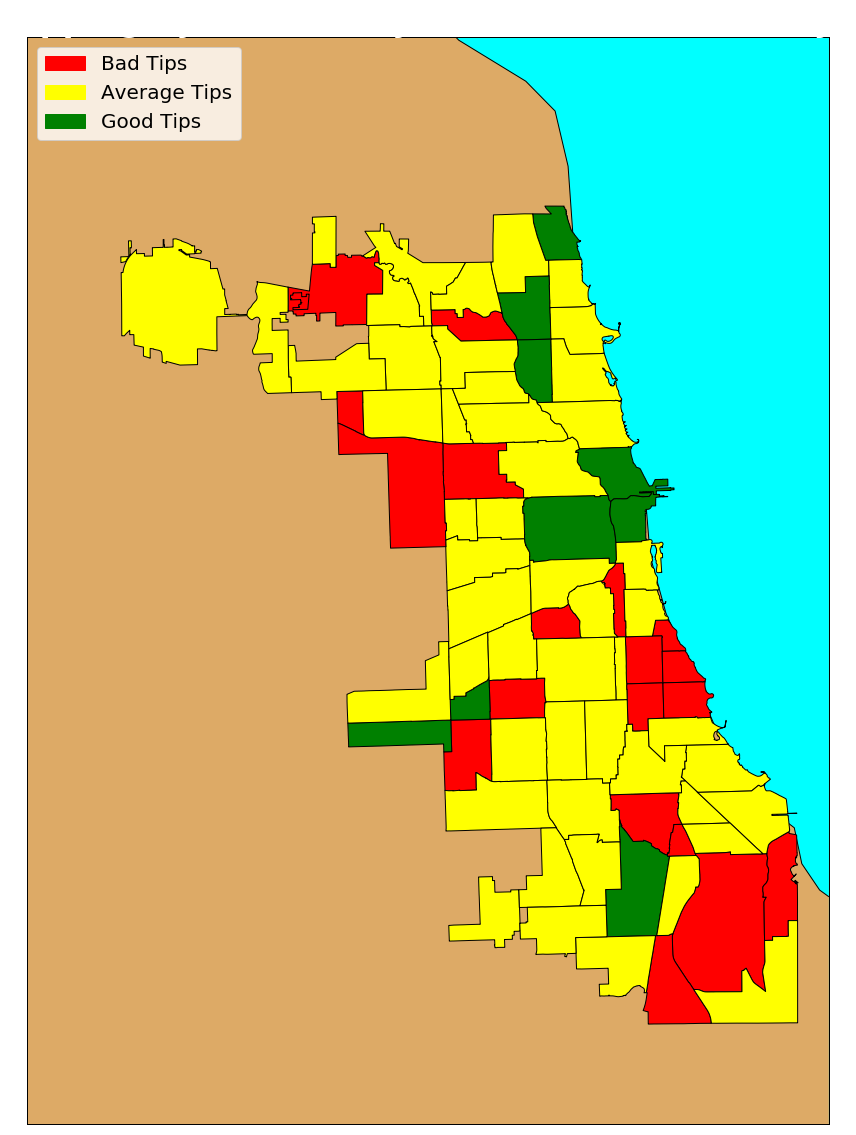

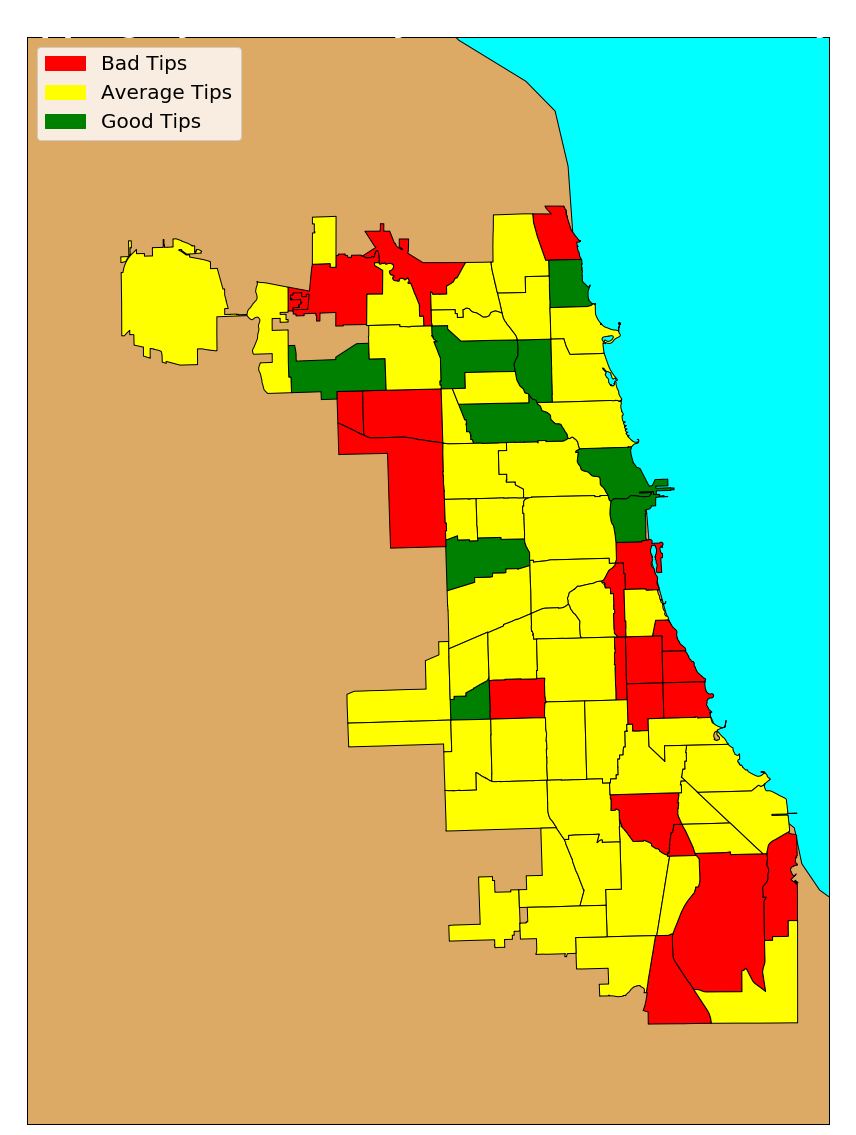

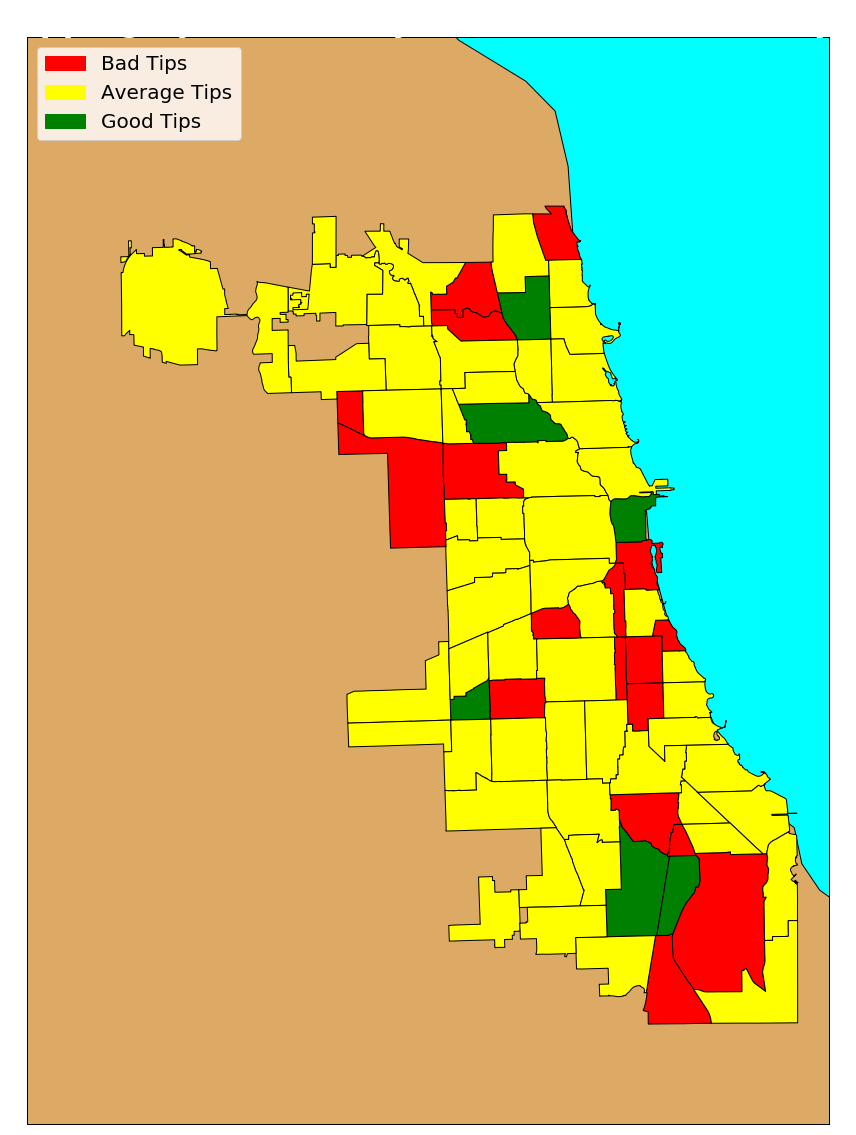

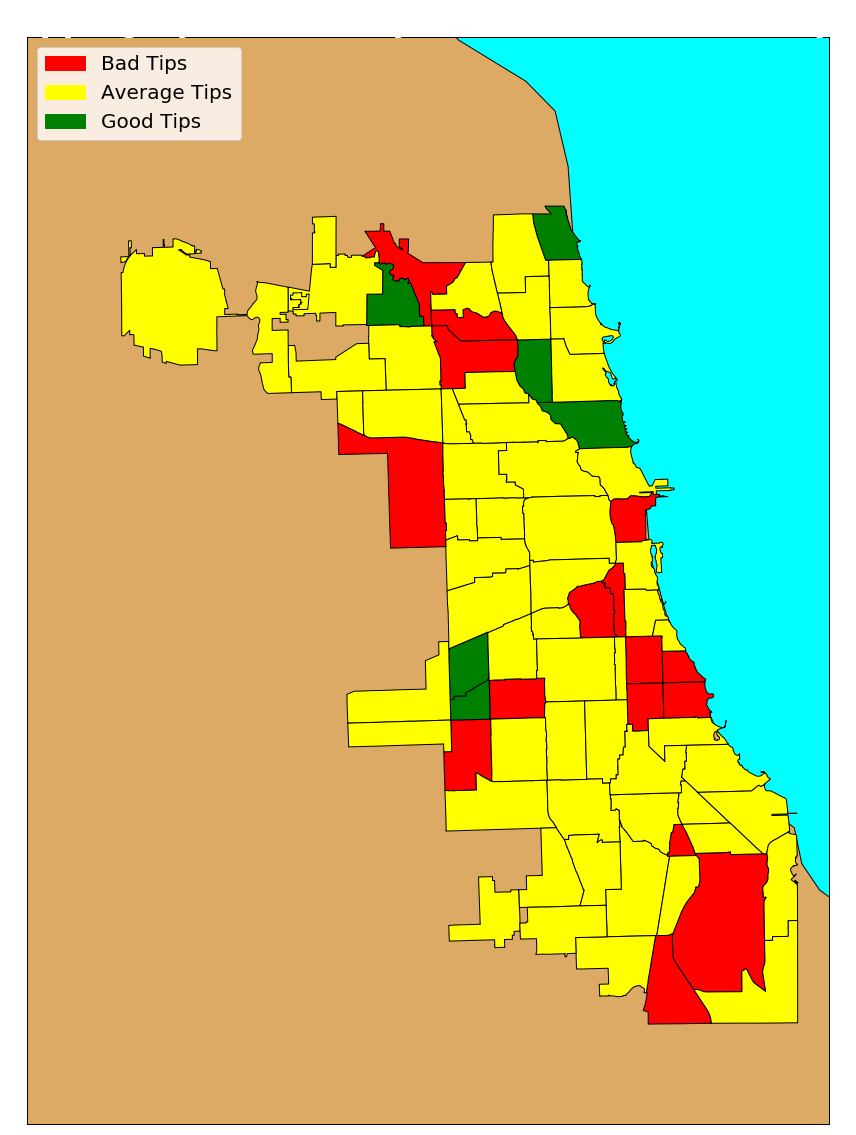

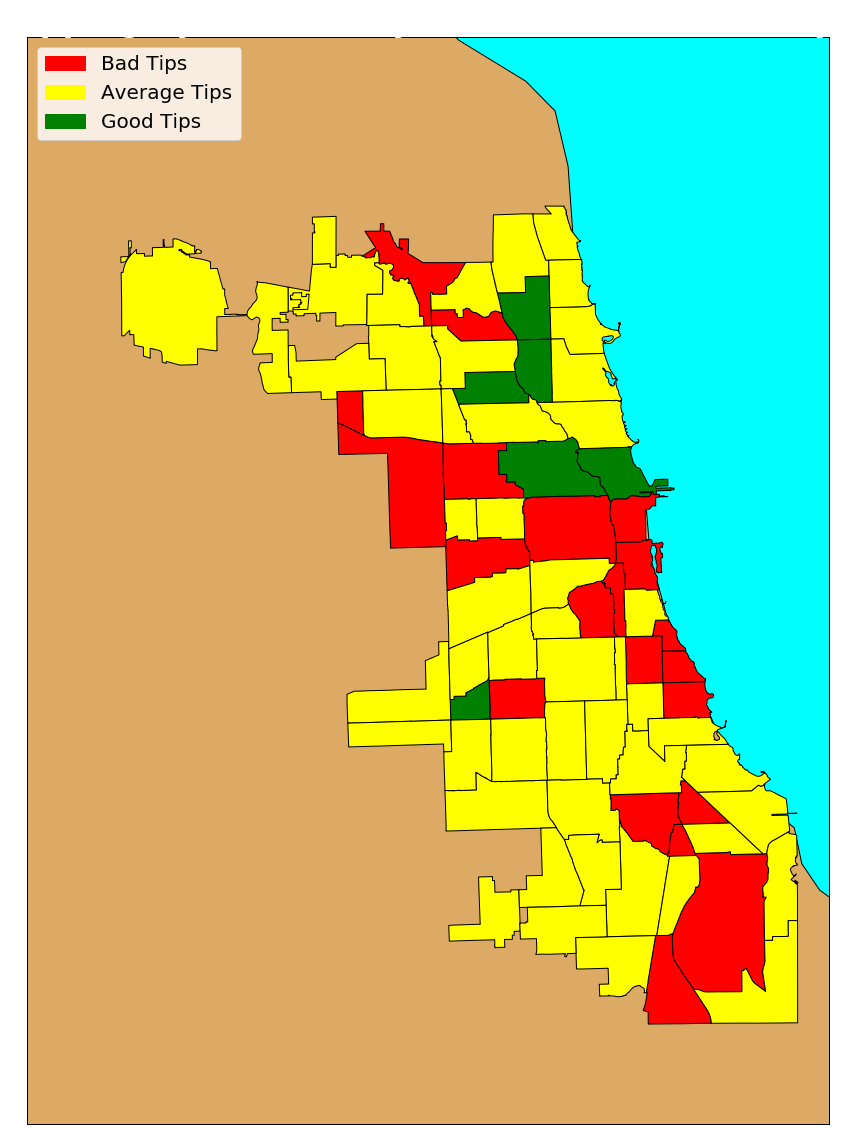

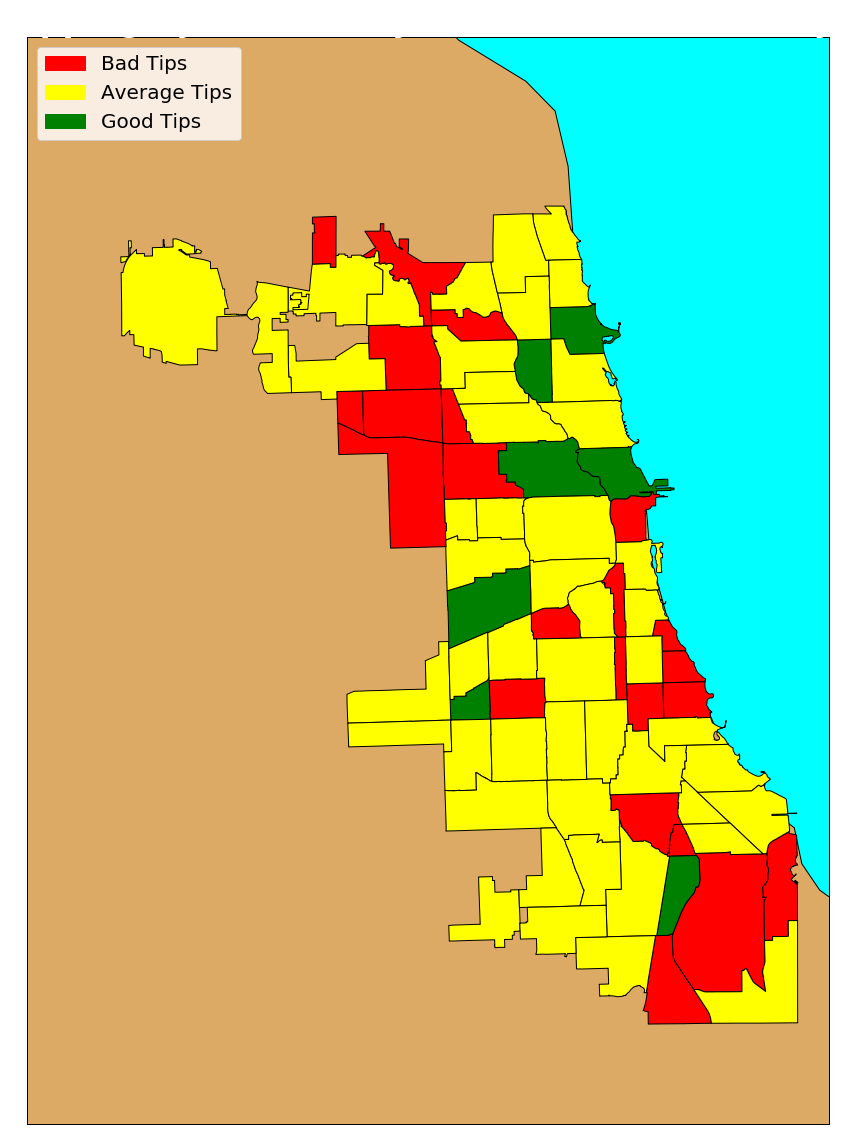

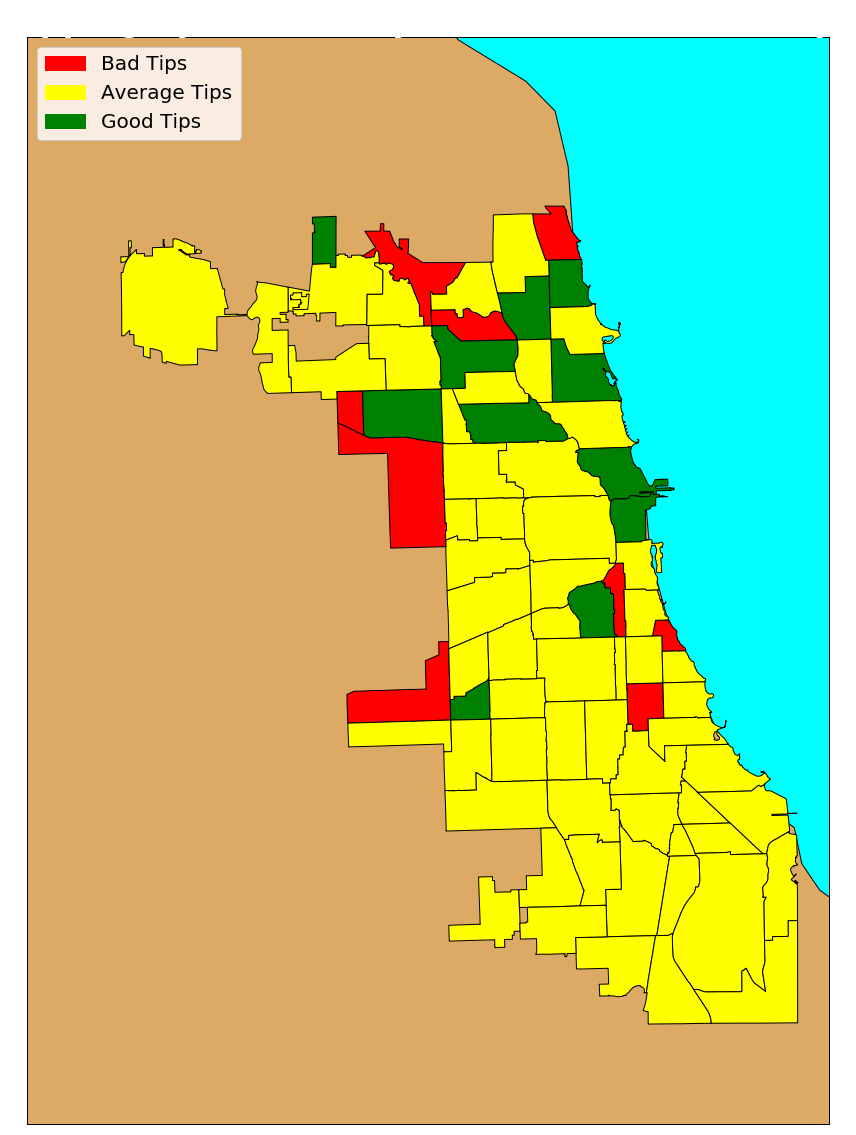

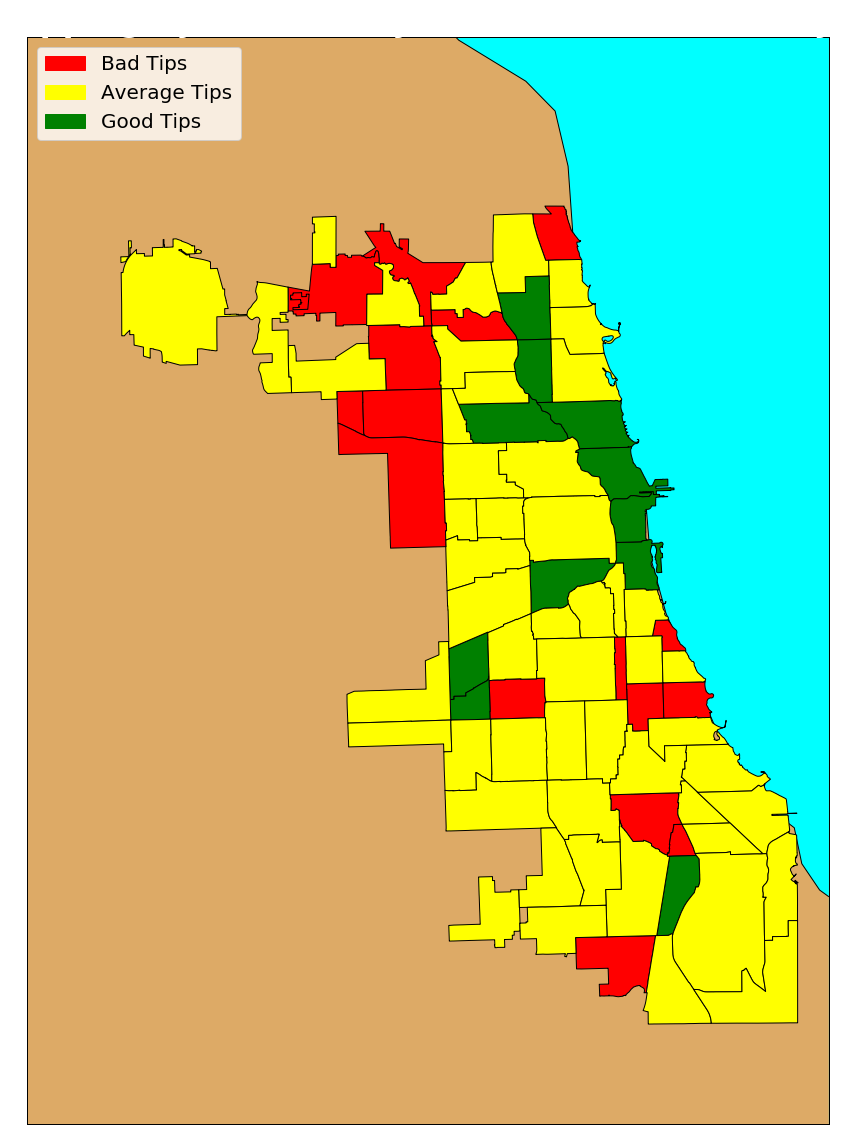

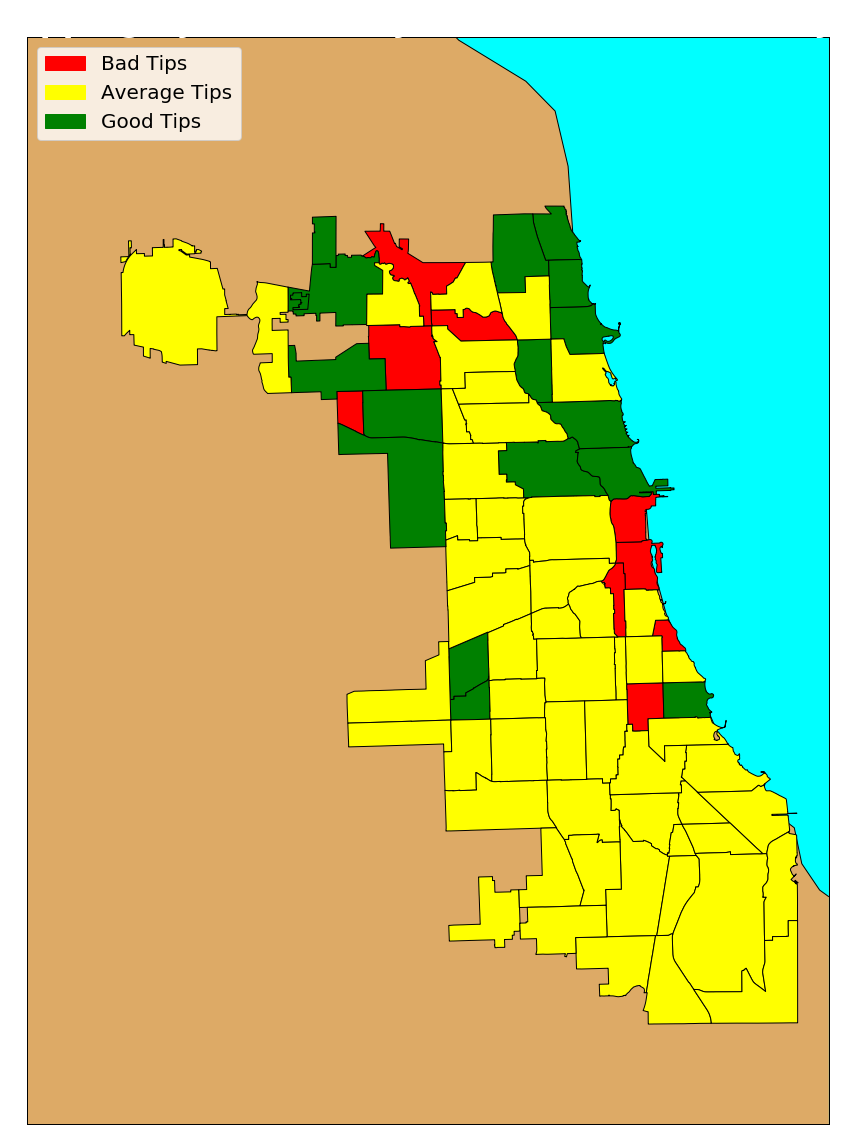

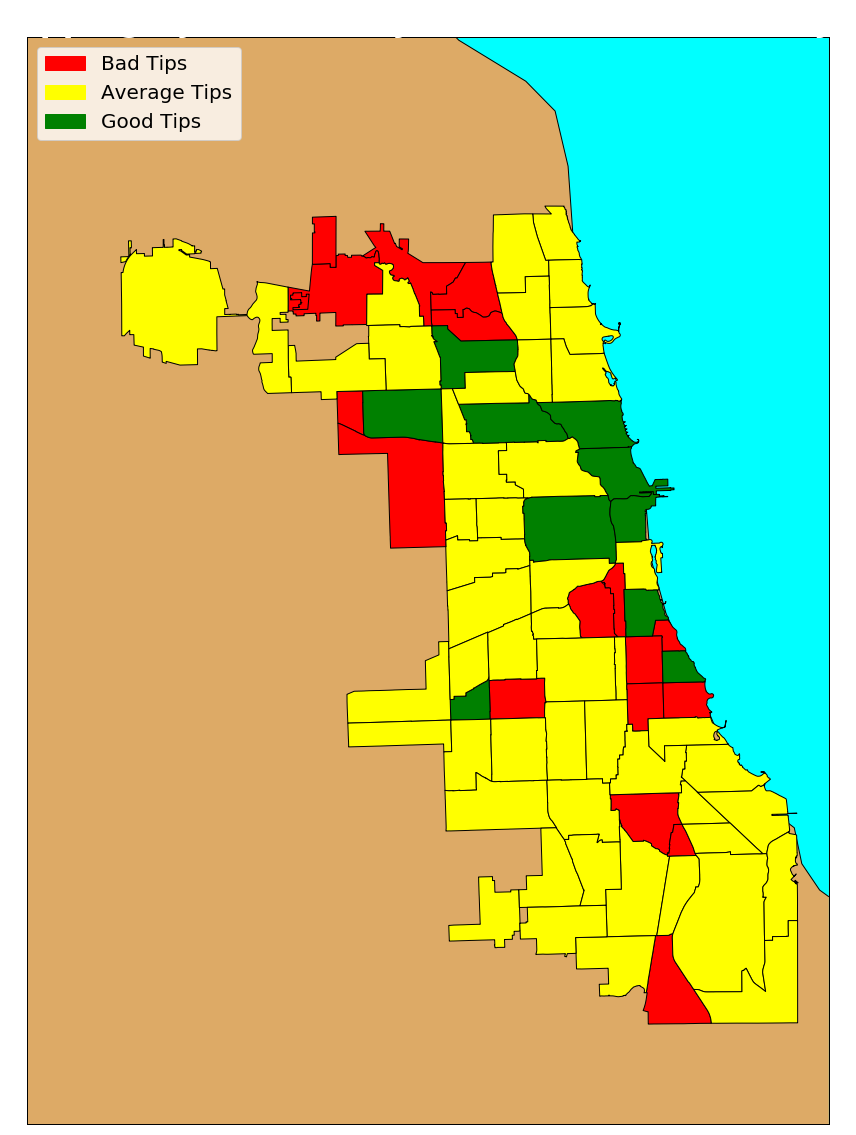

In [73]:
for time in range(24):
    input_array = np.zeros((77, 90))
    for x in range(66):
        input_array[x, x] = 1
    time_input = time #### to be determined by user   
    time_index = time_input + 66

    input_array[:, time_index] = 1

    predictions = model.predict(input_array)



    lowzones = []
    highzones = []    
    for i, prediction in enumerate(predictions):
    #     print(communities[i], prediction)
        if prediction > 0.25:
            highzones.append(str(bleach(communities[i])))
        elif prediction < 0.20:
            lowzones.append(str(i))
        else:
            pass


    fig = plt.figure()
    plt.title('Tipping by Community Area at %s:00 (military)' % str(time_input), fontsize=32, 
              color='white', fontweight='bold')
    ax = fig.add_subplot(111)
    mapsy = Basemap(
                llcrnrlon='-88',
                llcrnrlat='41.60',
                urcrnrlon='-87.5',
                urcrnrlat='42.1',
                resolution='h',
                ellps='GRS80',
                k_0=0.9999749999999999,
                projection='tmerc',
                lat_0=36.66666666666666, 
                lon_0=-88.33333333333333)

    mapsy.drawmapboundary(fill_color='aqua')
    mapsy.fillcontinents(color='#ddaa66',lake_color='aqua')
    mapsy.drawcoastlines()

    mapsy.readshapefile('community_areas/geo_export_05bfe831-9f3c-46a3-b679-9da7fc7e56ac', 'chicago',
                       drawbounds = False)

    red_patches = []
    yellow_patches = []
    green_patches = []



    for info, shape in zip(mapsy.chicago_info, mapsy.chicago):
        if info['area_numbe'] in lowzones:
            red_patches.append( Polygon(np.array(shape), True))
        elif info['area_numbe'] in highzones:
            green_patches.append( Polygon(np.array(shape), True))    
        else:
            yellow_patches.append( Polygon(np.array(shape), True))

    ax.add_collection(PatchCollection(red_patches, facecolor = 'r', edgecolor='k',
                                     linewidths=1., zorder=2))
    ax.add_collection(PatchCollection(green_patches, facecolor = 'g', edgecolor='k',
                                     linewidths=1., zorder=2))
    ax.add_collection(PatchCollection(yellow_patches, facecolor = '#ffff00', edgecolor='k',
                                     linewidths=1., zorder=2))


    red_patch = mpatches.Patch(color='r', label='Bad Tips')
    yellow_patch = mpatches.Patch(color='#ffff00', label='Average Tips')
    green_patch = mpatches.Patch(color='g', label='Good Tips')
    plt.legend(handles=[red_patch, yellow_patch, green_patch], fontsize=20)

    plt.show()
    plt.clf()
# plt.savefig('')